<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Sales_of_Dairy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dairy Goods Sales Dataset**

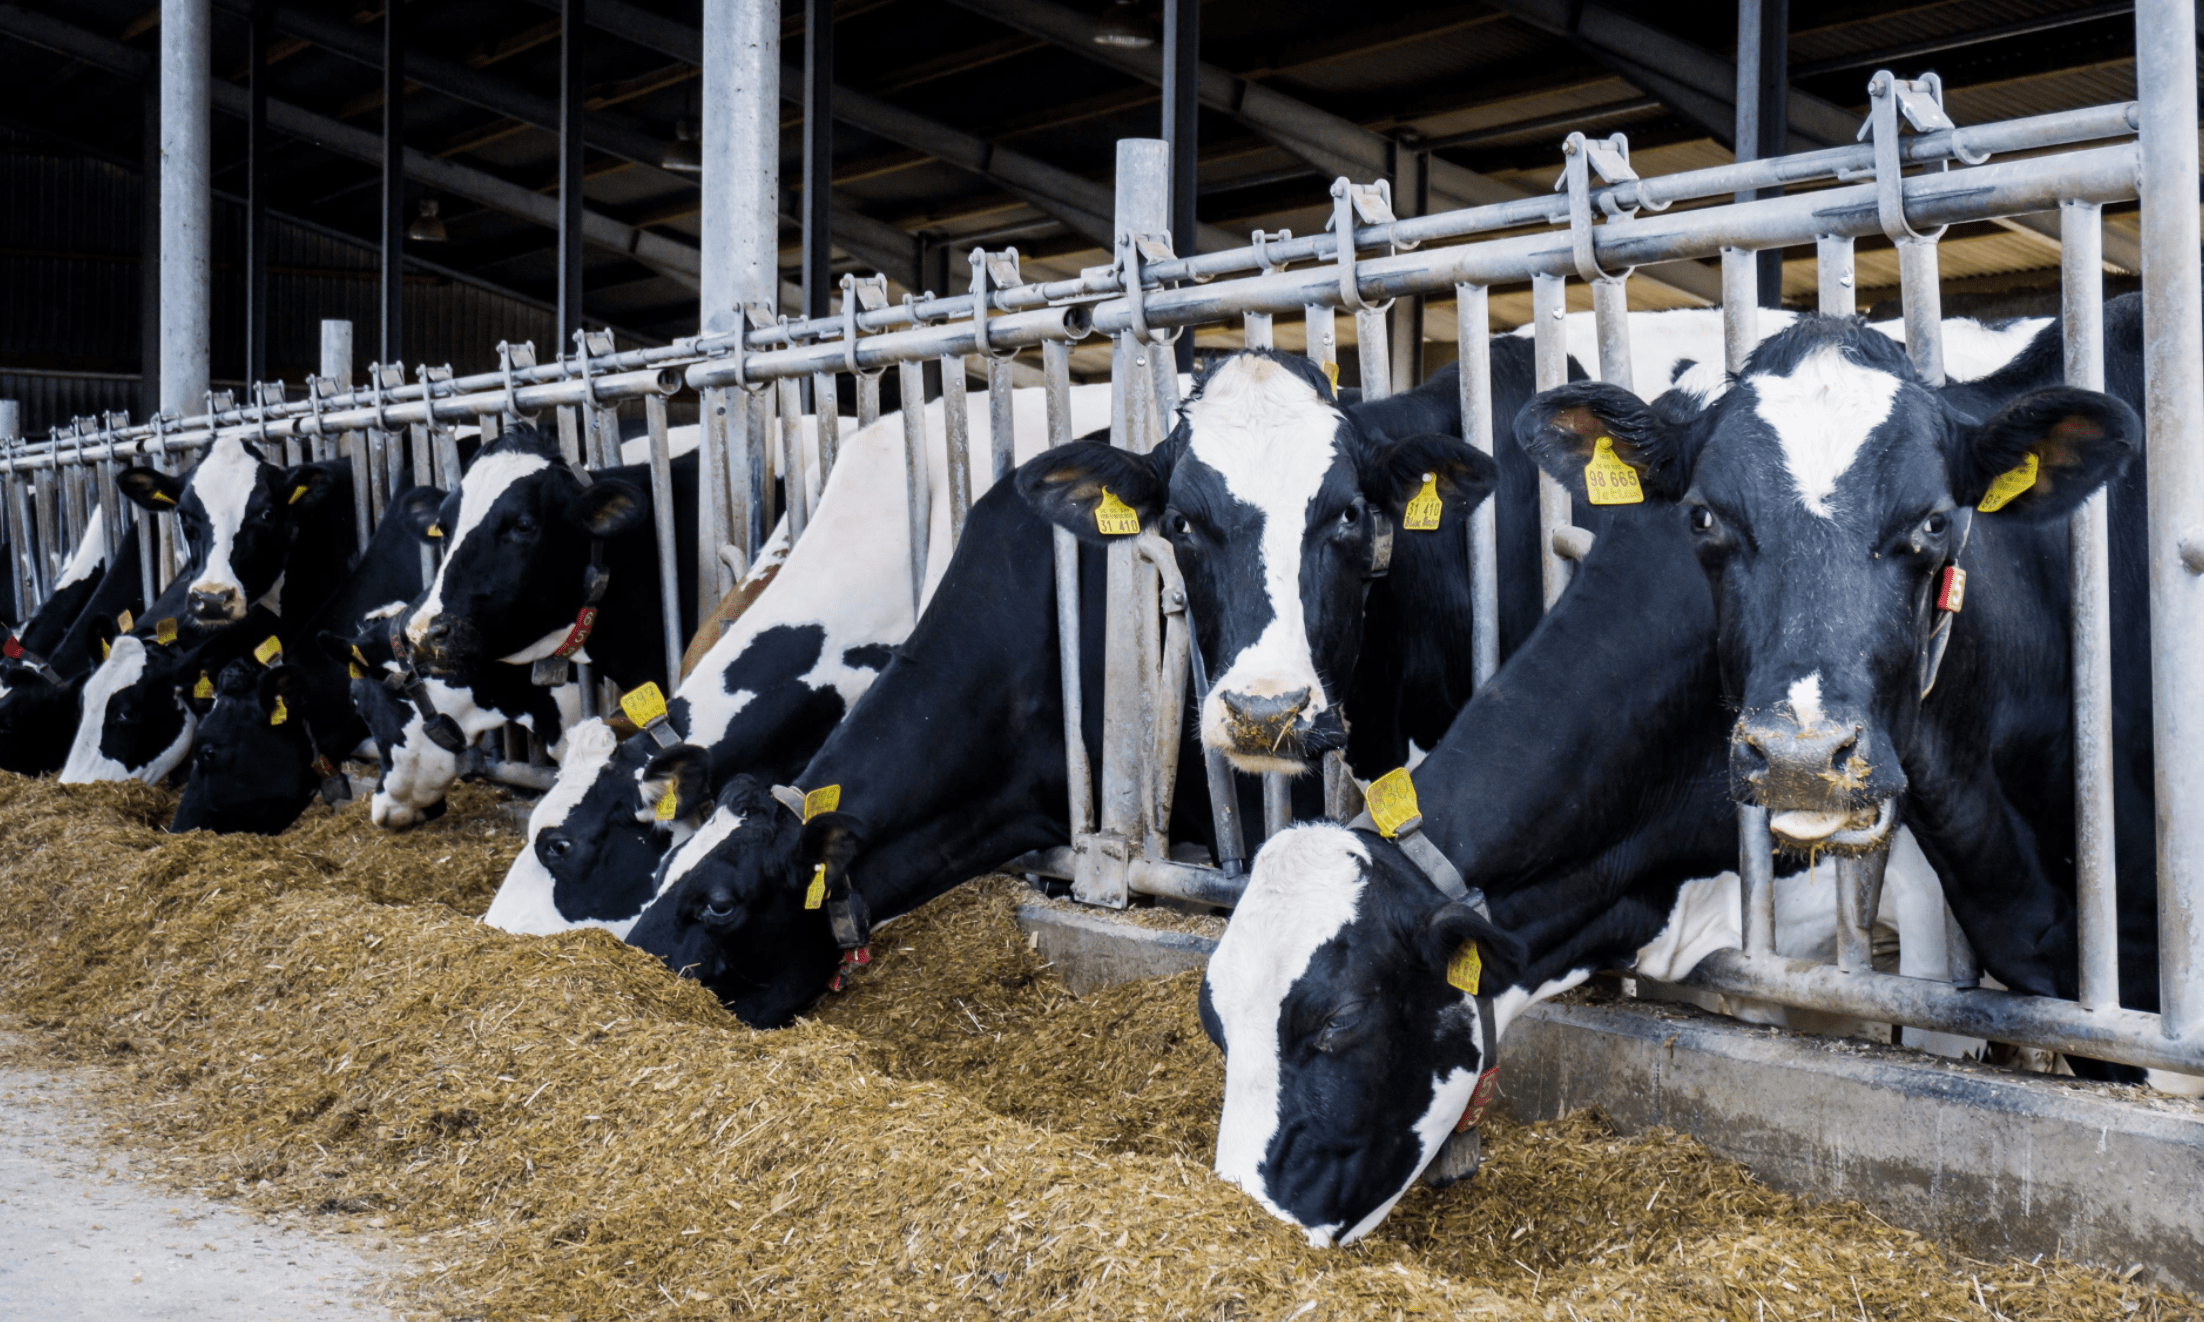

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data into a pandas dataframe

df = pd.read_csv("/content/dairy_dataset.csv")

In [3]:
# Let's have a look at the first 5 rows

df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [4]:
df["Location"].sum()

'TelanganaUttar PradeshTamil NaduTelanganaMaharashtraTelanganaKarnatakaBiharWest BengalTelanganaMadhya PradeshChandigarhDelhiTelanganaGujaratKeralaMadhya PradeshKeralaMadhya PradeshTamil NaduJharkhandBiharGujaratKarnatakaMaharashtraRajasthanMadhya PradeshJharkhandChandigarhKeralaChandigarhDelhiBiharTamil NaduKarnatakaBiharChandigarhMaharashtraKarnatakaJharkhandChandigarhDelhiTamil NaduChandigarhRajasthanChandigarhMadhya PradeshMadhya PradeshHaryanaChandigarhJharkhandRajasthanRajasthanDelhiKeralaMaharashtraTelanganaMaharashtraDelhiTelanganaRajasthanDelhiChandigarhChandigarhDelhiUttar PradeshGujaratUttar PradeshRajasthanMaharashtraChandigarhJharkhandBiharKarnatakaDelhiChandigarhMaharashtraHaryanaKarnatakaUttar PradeshGujaratUttar PradeshJharkhandJharkhandWest BengalJharkhandRajasthanUttar PradeshGujaratUttar PradeshMaharashtraGujaratTamil NaduMadhya PradeshWest BengalKarnatakaKeralaDelhiWest BengalGujaratMadhya PradeshChandigarhTamil NaduUttar PradeshGujaratChandigarhKarnatakaJharkhandKa

In [5]:
# Let's see how many rows and columnns we have and
df.shape


(4325, 23)

In [6]:
# Let's see if there are any missings value in the dataset

df.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [7]:
# Look at the describtive statistics

df.describe()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
count,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.000000,4325.00000,4325.000000,4325.000000,4325.000000,4325.000000
mean,503.483073,54.963699,5.509595,500.652657,54.785938,27357.845411,29.127630,248.095029,54.77914,13580.265401,252.068671,55.826143,109.107820
std,285.935061,26.111487,2.842979,288.975915,26.002815,21621.051594,30.272114,217.024182,26.19279,14617.009122,223.620870,26.301450,51.501035
min,10.170000,10.000000,1.000000,1.170000,10.030000,42.516500,1.000000,1.000000,5.21000,12.540000,0.000000,10.020000,20.020000
25%,252.950000,32.000000,3.000000,254.170000,32.460000,9946.814500,10.000000,69.000000,32.64000,2916.650000,66.000000,32.910000,64.280000
50%,509.170000,55.000000,6.000000,497.550000,54.400000,21869.652900,22.000000,189.000000,54.14000,8394.540000,191.000000,56.460000,108.340000
75%,751.250000,77.000000,8.000000,749.780000,77.460000,40954.441000,30.000000,374.000000,77.46000,19504.550000,387.000000,79.010000,153.390000
max,999.530000,100.000000,10.000000,999.930000,99.990000,99036.369600,150.000000,960.000000,104.51000,89108.900000,976.000000,99.990000,199.950000


In [8]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

# **Visualization**

In [9]:
df.nunique()

Location                                 15
Total Land Area (acres)                4235
Number of Cows                           91
Farm Size                                 3
Date                                   1278
Product ID                               10
Product Name                             10
Brand                                    11
Quantity (liters/kg)                   4224
Price per Unit                         3409
Total Value                            4325
Shelf Life (days)                       146
Storage Condition                         5
Production Date                        1405
Expiration Date                        1441
Quantity Sold (liters/kg)               806
Price per Unit (sold)                  3446
Approx. Total Revenue(INR)             4304
Customer Location                        15
Sales Channel                             3
Quantity in Stock (liters/kg)           808
Minimum Stock Threshold (liters/kg)    3432
Reorder Quantity (liters/kg)    

In [10]:
Product_Sold = df.groupby(["Location", 'Product Name','Brand', 'Farm Size','Storage Condition', 'Customer Location']).agg({'Quantity Sold (liters/kg)':'sum', 'Approx. Total Revenue(INR)': 'sum'}).reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lassi'),
  Text(1, 0, 'Ice Cream'),
  Text(2, 0, 'Buttermilk'),
  Text(3, 0, 'Paneer'),
  Text(4, 0, 'Cheese'),
  Text(5, 0, 'Ghee'),
  Text(6, 0, 'Milk'),
  Text(7, 0, 'Butter'),
  Text(8, 0, 'Curd'),
  Text(9, 0, 'Yogurt')])

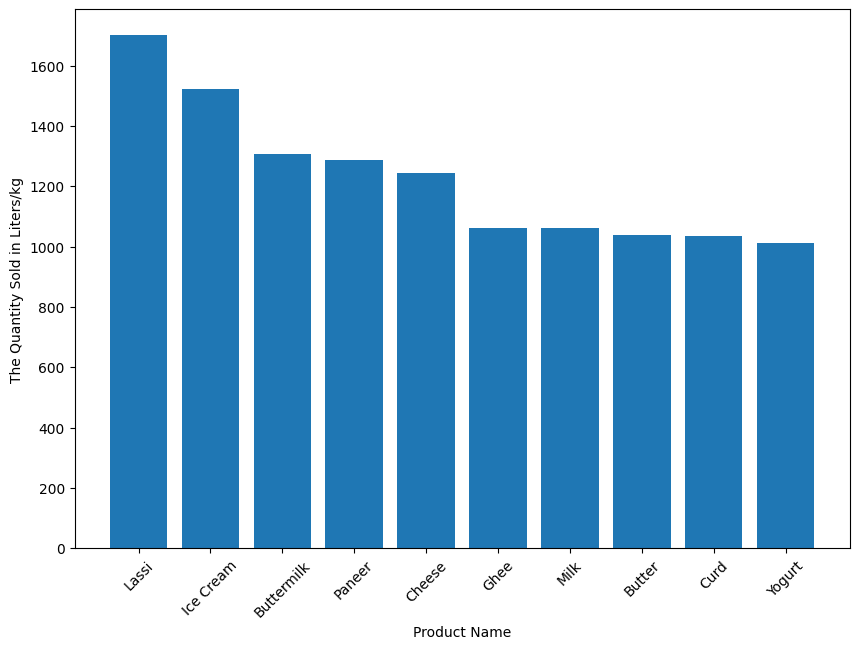

In [11]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Product Name'], product_sold_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('The Quantity Sold in Liters/kg')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Sudha'),
  Text(1, 0, 'Palle2patnam'),
  Text(2, 0, 'Amul'),
  Text(3, 0, 'Mother Dairy'),
  Text(4, 0, 'Raj'),
  Text(5, 0, 'Warana'),
  Text(6, 0, 'Parag Milk Foods'),
  Text(7, 0, 'Britannia Industries'),
  Text(8, 0, 'Passion Cheese'),
  Text(9, 0, 'Dodla Dairy'),
  Text(10, 0, 'Dynamix Dairies')])

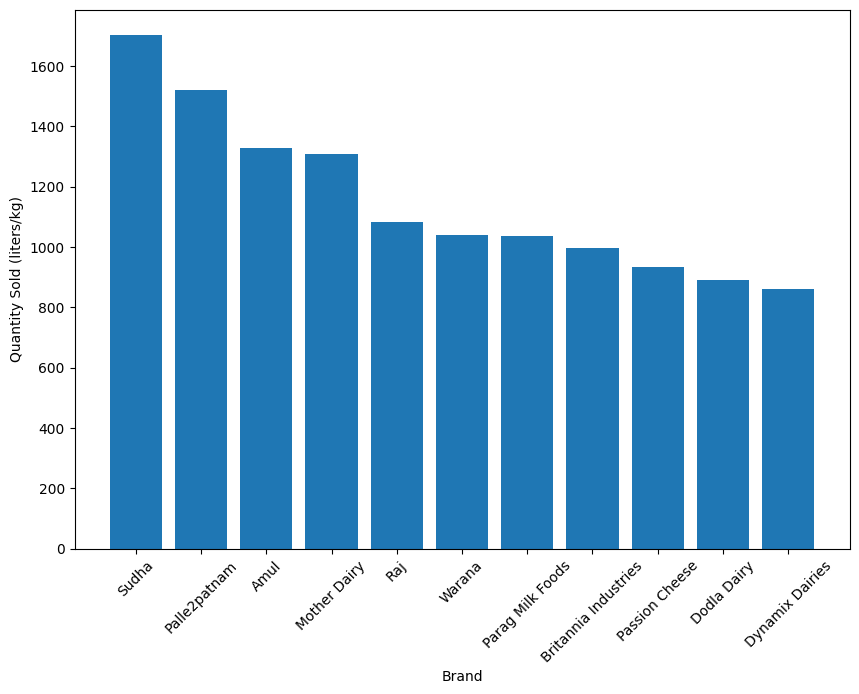

In [12]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Brand'], product_sold_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Brand')
plt.ylabel('Quantity Sold (liters/kg)')
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'Large')])

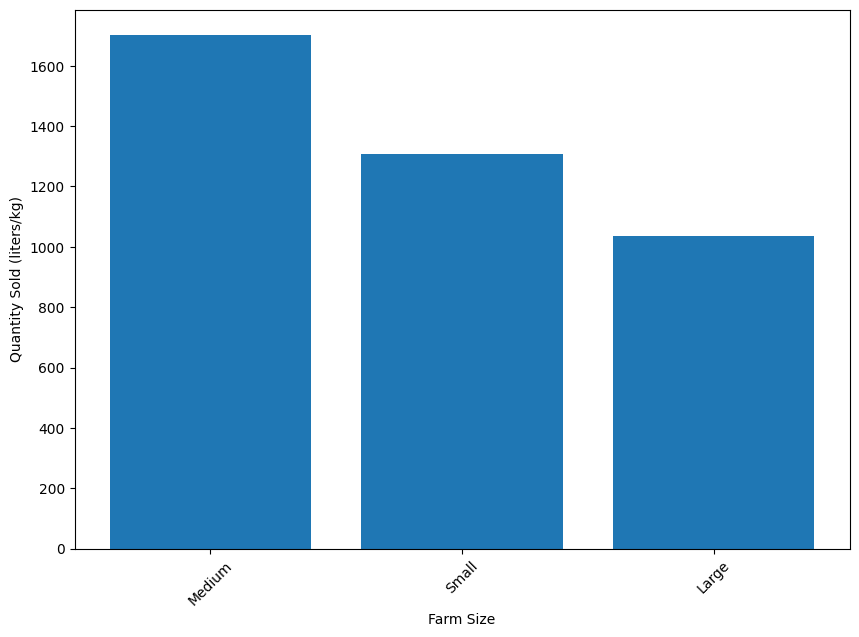

In [13]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Farm Size'], product_sold_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Farm Size')
plt.ylabel('Quantity Sold (liters/kg)')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Refrigerated'),
  Text(1, 0, 'Frozen'),
  Text(2, 0, 'Ambient'),
  Text(3, 0, 'Tetra Pack'),
  Text(4, 0, 'Polythene Packet')])

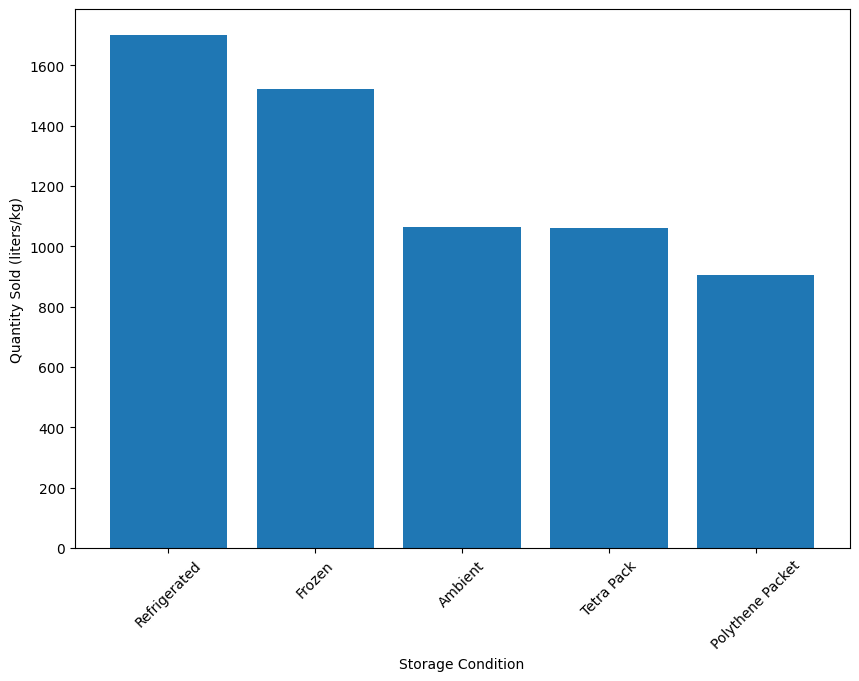

In [14]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Storage Condition'], product_sold_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Storage Condition')
plt.ylabel('Quantity Sold (liters/kg)')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Lassi'),
  Text(1, 0, 'Ice Cream'),
  Text(2, 0, 'Buttermilk'),
  Text(3, 0, 'Paneer'),
  Text(4, 0, 'Cheese'),
  Text(5, 0, 'Ghee'),
  Text(6, 0, 'Milk'),
  Text(7, 0, 'Butter'),
  Text(8, 0, 'Curd'),
  Text(9, 0, 'Yogurt')])

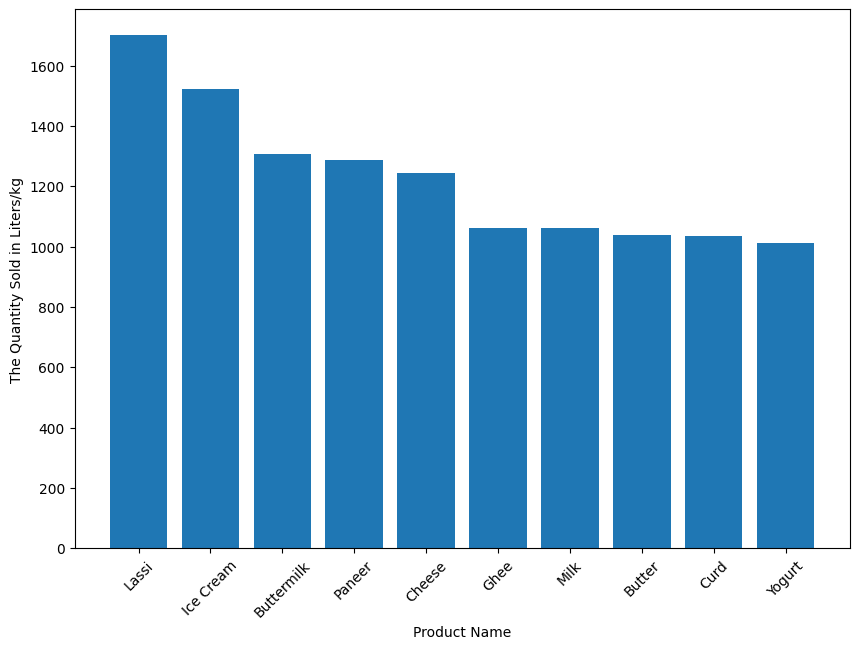

In [15]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Product Name'], product_sold_sorted['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('The Quantity Sold in Liters/kg')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Jharkhand'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'West Bengal'),
  Text(6, 0, 'Kerala'),
  Text(7, 0, 'Chandigarh'),
  Text(8, 0, 'Rajasthan'),
  Text(9, 0, 'Madhya Pradesh'),
  Text(10, 0, 'Telangana'),
  Text(11, 0, 'Gujarat'),
  Text(12, 0, 'Tamil Nadu'),
  Text(13, 0, 'Haryana'),
  Text(14, 0, 'Karnataka')])

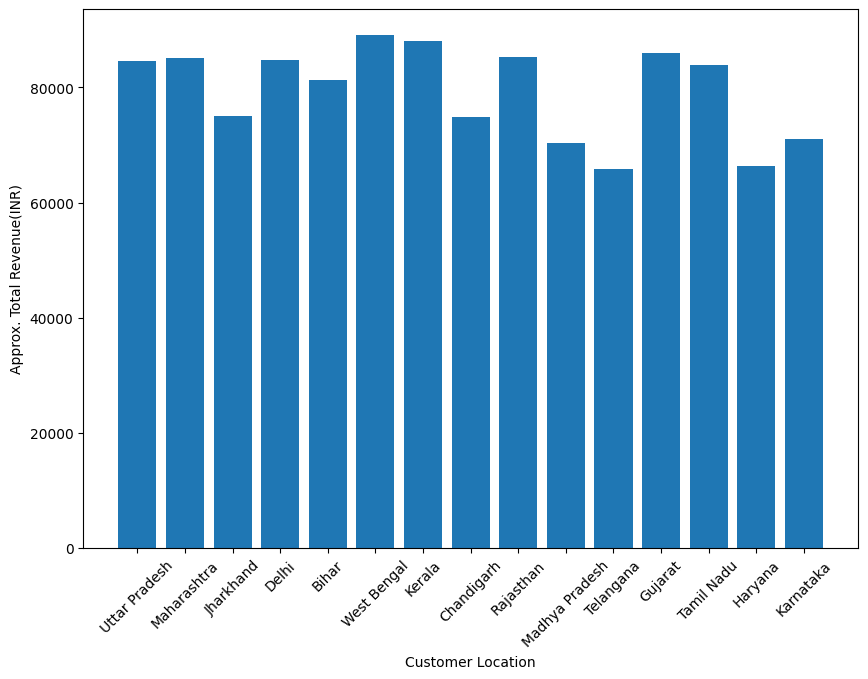

In [16]:
plt.figure(figsize=(10,7))
product_sold_sorted = Product_Sold.sort_values('Quantity Sold (liters/kg)', ascending=False)
plt.bar(product_sold_sorted['Customer Location'], product_sold_sorted['Approx. Total Revenue(INR)'])
plt.xlabel('Customer Location')
plt.ylabel('Approx. Total Revenue(INR)')
plt.xticks(rotation=45)

## **Label Encoding**

In [17]:
# Chaning Categorial Values to Numerical Values

label_encoder = LabelEncoder()

Categorical = ['Location', 'Farm Size', 'Product Name', 'Brand', 'Storage Condition','Customer Location', 'Sales Channel']

# Fit and transform the categorical data
numeric_data = label_encoder.fit_transform(Categorical)

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [20]:
for column in df:
    df[column] = pd.factorize(df[column])[0]

# **Split The Data Into Freatures and Targets**

In [21]:
X = df.drop(['Approx. Total Revenue(INR)',], axis=1)
Y = df['Approx. Total Revenue(INR)']

# **Splitting The Data Into Test and Train**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

## **Model Training**

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
# Loading the model

model = XGBRegressor()

In [26]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# **Model Evalution**

In [27]:
training_data_prediction = model.predict(X_train)

In [28]:
print(training_data_prediction)

[2180.       890.6775  1018.65936 ... 2498.04    3600.0642  2572.6936 ]


In [29]:
# R Square Error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("The R Square Error :", score_1)
print("The Mean Absolute Error :", score_2)

The R Square Error : 0.9999833220518866
The Mean Absolute Error : 3.5498855335519495


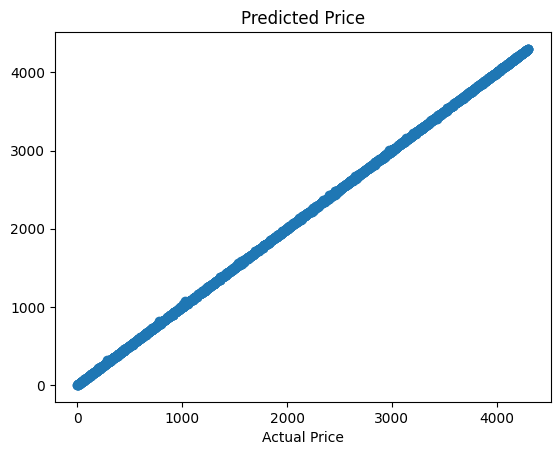

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()

test

In [31]:
testing_data_prediction = model.predict(X_test)

In [32]:
print(testing_data_prediction)

[2.29461084e+03 1.87202051e+03 5.36790222e+02 2.65043311e+03
 9.44429855e+01 2.63359644e+03 9.63667847e+02 2.24426245e+03
 1.16428638e+03 2.29879053e+03 3.15410492e+02 2.32256982e+03
 1.13140234e+03 2.05911514e+02 3.15967822e+03 5.02467346e+02
 2.49310742e+03 9.90884216e+02 2.55195483e+03 4.25208252e+03
 9.13730392e+01 3.95962744e+03 2.35805859e+03 1.29624817e+03
 2.49278101e+03 4.10721387e+03 3.48449707e+03 2.64248413e+03
 2.86373633e+03 1.64741162e+03 3.73951611e+03 2.35748584e+03
 1.41748667e+01 3.62340918e+03 3.54459619e+03 8.13332520e+02
 2.29748486e+03 4.35977997e+02 9.96082031e+02 3.62732520e+03
 1.44813318e+03 8.99851990e+01 2.80450049e+03 2.78088501e+03
 7.27202148e+02 2.81319556e+03 2.18652930e+03 2.79474274e+02
 1.23228210e+03 3.31372168e+03 2.06733130e+03 1.12159460e+03
 3.71066235e+03 5.39824585e+02 1.32586609e+03 2.43191748e+03
 6.71393860e+02 3.32273218e+03 2.29469165e+03 2.76575854e+03
 3.04066943e+03 2.34547217e+03 6.99145020e+02 1.79174097e+03
 3.96471509e+03 1.044062

In [33]:
# R Square Error

score_3 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error

score_4 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("The R Square Error :", score_3)
print("The Mean Absolute Error :", score_4)

The R Square Error : 0.9932253562490867
The Mean Absolute Error : 23.82315405503863


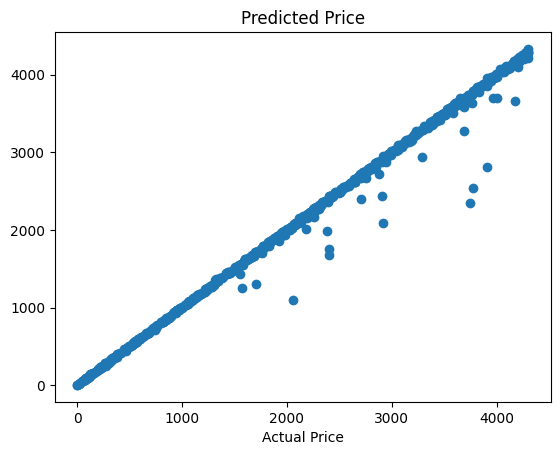

In [34]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Price')
plt.title("Predicted Price")
plt.show()